# Introduction

According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

# Objectives

1. Perform analysis of dataset, observing relationships between features and target

2. Create a Neural Network to perform binary classification of target status

# Import data

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [4]:
# Read the csv file and preview the table
heart = pd.read_csv("heart_2020_cleaned.csv")
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
#determine shape of table (# of rows and # of columns)
heart.shape

(319795, 18)

# Data Preparation

In [6]:
# Check for null values
heart.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

Looks like this dataset is pretty clean with no missing values, meaning we will not have to impute to fill in any gaps. 

# Categorical Variable Conversion

In [7]:
# Get list of categorical variables
s = (heart.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


First, let's convert simple yes/no categorical data to a binary output

In [8]:
column_yesno = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

heart[column_yesno] = heart[column_yesno].apply(lambda x: x.map({'Yes':1,'No':0}))
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1.0,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0.0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1.0,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0.0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0.0,1,Very good,8.0,0,0,0


In [9]:
# Check the data
heart.info()
heart_orig = heart

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          310455 non-null  float64
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [10]:
X = heart.copy()
y = X.pop('HeartDisease')

features_num = [
    'BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','Diabetic','PhysicalActivity','SleepTime','Asthma','KidneyDisease','SkinCancer'
]

features_cat = [
    'Sex','AgeCategory','Race','GenHealth'
]

print("Numerical variables:")
print(features_num)

print("Categorical variables:")
print(features_cat)

Numerical variables:
['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']
Categorical variables:
['Sex', 'AgeCategory', 'Race', 'GenHealth']


# Data Visualization

Before we ingest our data into a data pipeline for our Neural Network, let's do some basic data analysis and visualization to gain some insight. First, we'll make a copy of the dataframe that we can work off of.

In [11]:
data = heart.copy()
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1.0,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0.0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1.0,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0.0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0.0,1,Very good,8.0,0,0,0


First,let's take a look at the distribution of the data by Sex.

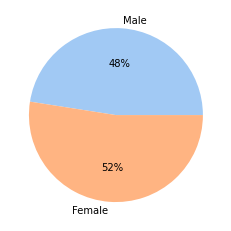

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

total_male = data['Sex'].loc[data['Sex'] == 'Male'].count()
percent_male = total_male/len(data.index)
total_female = len(data.index)-total_male
percent_female = total_female/len(data.index)

#define data for pie chart
gender_percent = [percent_male,percent_female]
labels = ['Male', 'Female']

#define color palette
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(gender_percent, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

Great, it looks like our data is well represented with both Male and Female participants.

Now, let's do the same but with disease status.

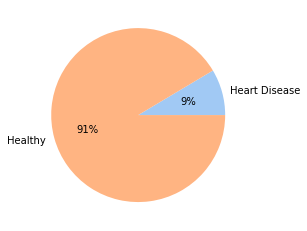

In [13]:
total_disease = data['HeartDisease'].loc[data['HeartDisease'] == 1].count()
total_healthy = data['HeartDisease'].loc[data['HeartDisease'] == 0].count()

disease_percent = [(total_disease/len(data)), (total_healthy/len(data))]
labels = ['Heart Disease', 'Healthy']

#define color palette
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(disease_percent, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

As we can see, a small minority of patients in the dataset are positive for heart disease. Now, let's take a closer look into the distribution of various features among the two populations.

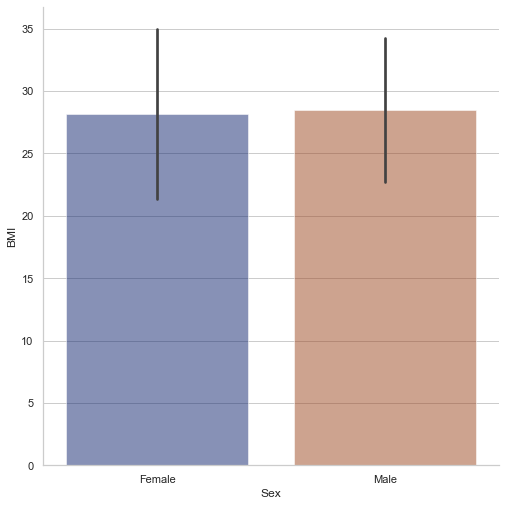

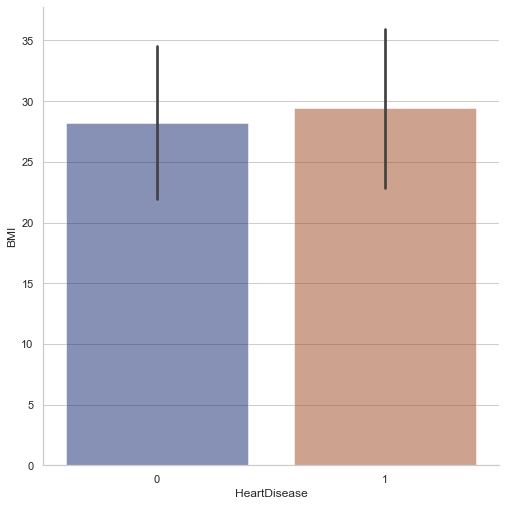

In [14]:
sns.set_theme(style="whitegrid")

BMI_sex = sns.catplot(data=data, kind='bar',x='Sex', y='BMI',ci='sd', palette='dark', alpha=0.5, height=7)


BMI_heart = sns.catplot(data=data, kind='bar',x='HeartDisease', y='BMI',ci='sd', palette='dark', alpha=0.5, height=7)

From the graph above, we can see that there isn't a large difference between the mean BMI between male and female patients

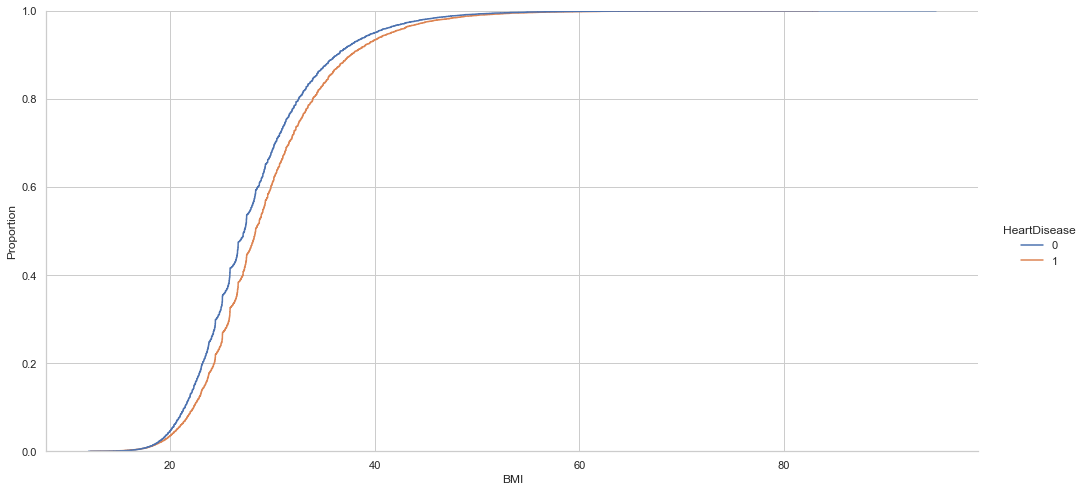

In [15]:
sns.displot(data=data, x='BMI', hue='HeartDisease', kind='ecdf', height=7, aspect=2/1)

An empirical cumulative distribution function plot (above) represents the proportion of observations falling below each unique value in a dataset. So as we can see from the plot above, comparing the two groups of patients with no heart disease (0) and positive for heart disease (1), the heart disease group is skewed towards the right. This means that for the same proportion of each group, the group with heart disease on average will have a higher BMI.

To see if there is a significant difference, we will need to do some statistics. First, we will need to check if the data is normally distributed.

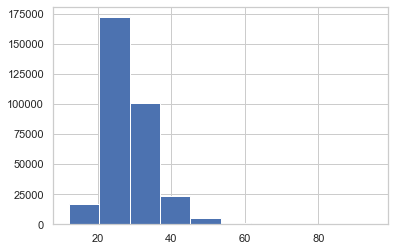

In [16]:
plt.hist(data['BMI'])
plt.show()

An initial look at a histogram of BMI doesn't look like the bellcurve shape of a normal distribution.

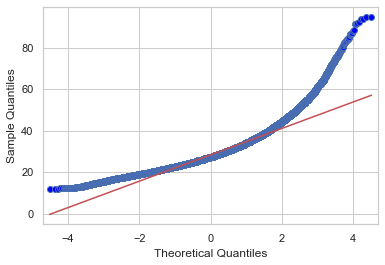

In [17]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data['BMI'], line='s')
plt.show()

A look at the Quantile-Quantile plot suggests that BMI in this dataset is not a Gaussian/Normal distribution, where it seriously deviates from the standard line. Because of this, we will compare the mean BMI between our two groups using a non-parametric test, the Mann-Whiteney U test, the non-parametric version of the Student t-test for unpaired data.

3528521416.5
the p-value is 4.5044916093895795e-231
Different distribution (reject H0)
Patients with heart disease have a mean BMI of 29.40159207978655
Patients without heart disease have a mean BMI of 28.22465833623946


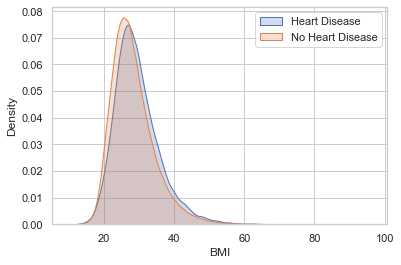

In [18]:
from scipy.stats import mannwhitneyu

data_disease = data[data['HeartDisease']==1]
data_disease_BMI = data_disease['BMI']

data_nodisease = data[data['HeartDisease']==0]
data_nodisease_BMI = data_nodisease['BMI']

U1, p = mannwhitneyu(data_disease_BMI, data_nodisease_BMI)
print(U1)
print("the p-value is", p)
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
    
sns.kdeplot(data=data_disease_BMI, shade=True, label='Heart Disease')
sns.kdeplot(data=data_nodisease_BMI, shade=True, label='No Heart Disease')
plt.legend()

print("Patients with heart disease have a mean BMI of", data_disease_BMI.mean())
print("Patients without heart disease have a mean BMI of", data_nodisease_BMI.mean())

With the above Mann-Whitney U test, we get an extremely small p-value of 9.0e-231, which is magnitudes smaller than our alpha of 0.05. Therefore we can say with confidence that in our data, the BMI of patients with heart disease is significantly higher than the BMI of patients without heart disease.

# Data Pipeline

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # unecessary, no missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

# Define Neural Network

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Optimizer, Loss, and Metric

In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3239 - binary_accuracy: 0.8747 - val_loss: 0.2282 - val_binary_accuracy: 0.9144
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2364 - binary_accuracy: 0.9138 - val_loss: 0.2257 - val_binary_accuracy: 0.9157
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2304 - binary_accuracy: 0.9154 - val_loss: 0.2250 - val_binary_accuracy: 0.9156
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2288 - binary_accuracy: 0.9156 - val_loss: 0.2257 - val_binary_accuracy: 0.9156
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2276 - binary_accuracy: 0.9158 - val_loss: 0.2248 - val_binary_accuracy: 0.9156
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2267 - binary_accuracy: 0.9160 - val_loss: 0.2250 - val_binary_accuracy: 0.9158
Epoch 7/200
469/469 [==============================] - 2s 

<AxesSubplot:title={'center':'Accuracy'}>

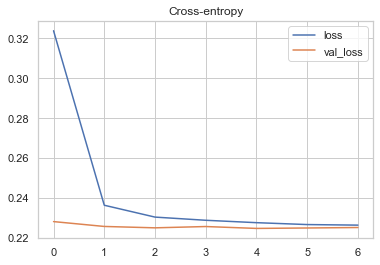

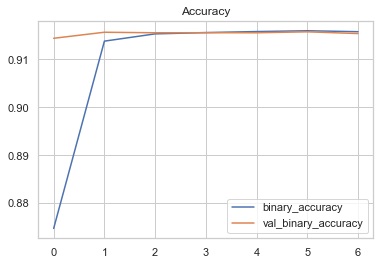

In [22]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

It seems like our Neural Network learned almost everything it needed to know by the first epoch with over 90% accuracy for binary classification of Heart Disease.